# Fraud Check

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not


So, we are going to start with importing libraries and loading data set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Fraud_check.csv')

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [6]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

Hence there is no null values present in the data set

We need to transform the data a little. We have to check if a person could commit fraud using the features like Undergrad, Martial.Status, Work.Experience, and Urban.

Also, we have to encode Taxable.Income column to set the labels for classification as Risky and Good.

First, let us move the output column to the end of the dataset.

In [7]:
temp_cols = df.columns.tolist()
temp_cols

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [8]:
index = df.columns.get_loc('Taxable.Income')

In [9]:
new_cols = temp_cols[0:index] + temp_cols[index +1 :] +temp_cols[index:index+1]
new_cols

['Undergrad',
 'Marital.Status',
 'City.Population',
 'Work.Experience',
 'Urban',
 'Taxable.Income']

In [10]:
df = df[new_cols]

In [11]:
df.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,NO,Single,50047,10,YES,68833
1,YES,Divorced,134075,18,YES,33700
2,NO,Married,160205,30,YES,36925
3,YES,Single,193264,15,YES,50190
4,NO,Married,27533,28,NO,81002


In [12]:
df.count()

Undergrad          600
Marital.Status     600
City.Population    600
Work.Experience    600
Urban              600
Taxable.Income     600
dtype: int64

In [13]:
df.describe()

,City.Population,Work.Experience,Taxable.Income
count,600.000000,600.000000,600.000000
mean,108747.368333,15.558333,55208.375000
std,49850.075134,8.842147,26204.827597
min,25779.000000,0.000000,10003.000000
25%,66966.750000,8.000000,32871.500000
50%,106493.500000,15.000000,55074.500000
75%,150114.250000,24.000000,78611.750000
max,199778.000000,30.000000,99619.000000


In [14]:
df['Taxable.Income']=pd.cut(df['Taxable.Income'], bins = [0,30000,100000], labels = ['Risky','Good'])

In [15]:
df.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [16]:
df['Taxable.Income'].value_counts()

Taxable.Income
Good     476
Risky    124
Name: count, dtype: int64

In [17]:
from sklearn import preprocessing

In [18]:
label_encoder = preprocessing.LabelEncoder()
df['Taxable.Income']=label_encoder.fit_transform(df['Taxable.Income'])

In [19]:
df.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,NO,Single,50047,10,YES,0
1,YES,Divorced,134075,18,YES,0
2,NO,Married,160205,30,YES,0
3,YES,Single,193264,15,YES,0
4,NO,Married,27533,28,NO,0


Here, it has encoded good as 0 and risky as 1

# EDA 
let us do some EDA analysis!


<Axes: xlabel='Marital.Status', ylabel='count'>

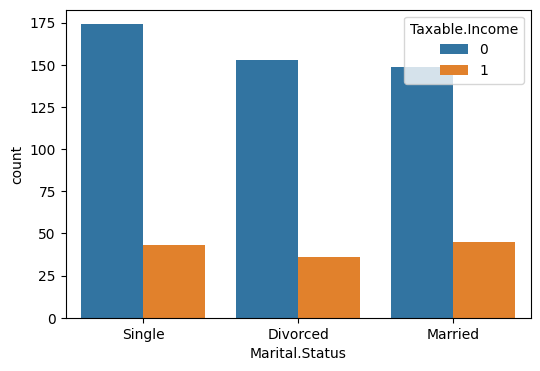

In [20]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'Marital.Status', hue = 'Taxable.Income', data = df)

<Axes: xlabel='Undergrad', ylabel='count'>

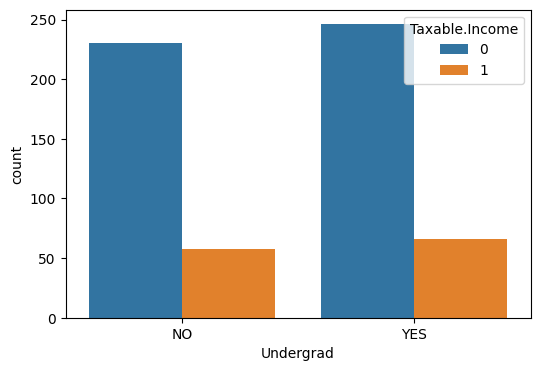

In [21]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'Undergrad', hue = 'Taxable.Income', data = df)

<Axes: xlabel='Urban', ylabel='count'>

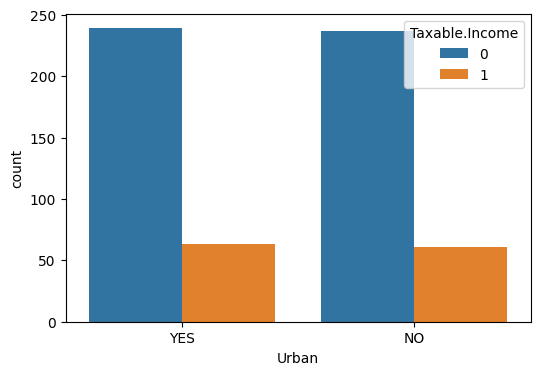

In [22]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'Urban', hue = 'Taxable.Income', data = df)

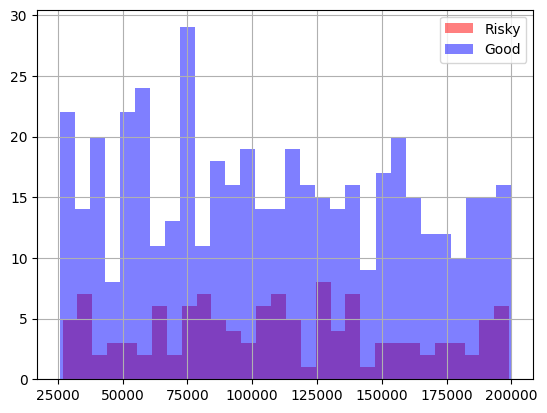

In [23]:
df[df['Taxable.Income']==1]['City.Population'].hist(alpha = 0.5, bins = 30, color = 'red', label = 'Risky')
df[df['Taxable.Income']==0]['City.Population'].hist(alpha = 0.5, bins = 30, color = 'blue', label = 'Good')
plt.legend()
plt.show()

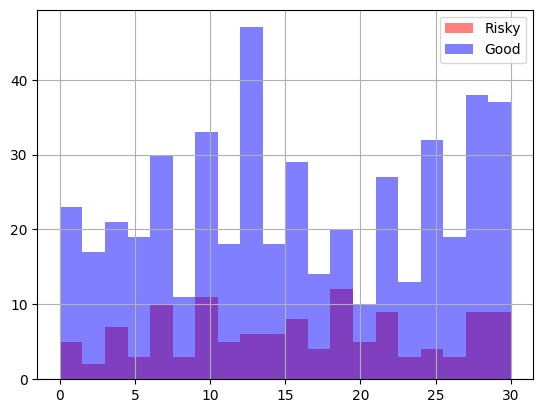

In [24]:
df[df['Taxable.Income']==1]['Work.Experience'].hist(alpha = 0.5, bins = 20, color = 'red', label = 'Risky')
df[df['Taxable.Income']==0]['Work.Experience'].hist(alpha = 0.5, bins = 20, color = 'blue', label = 'Good')
plt.legend()
plt.show()


We also need to transform other columns so as to be able to process them through the decision tree.

So, here we can either encode them, or us dummy variables. 
I prefer to go with encoding

In [25]:
le = preprocessing.LabelEncoder()
le.fit(['NO','YES'])

LabelEncoder()

In [26]:
df['Undergrad']=le.transform(df['Undergrad'])
df['Urban'] = le.transform(df['Urban'])

In [27]:
df.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,0,Single,50047,10,1,0
1,1,Divorced,134075,18,1,0
2,0,Married,160205,30,1,0
3,1,Single,193264,15,1,0
4,0,Married,27533,28,0,0


In [28]:
le1 = preprocessing.LabelEncoder()
le1.fit(['Single','Married','Divorced'])

LabelEncoder()

In [29]:
df['Marital.Status'] = le1.transform(df['Marital.Status'])

In [30]:
df.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


Here, Divorced is encoded as 0, Married is encoded as 1 and Single is encoded as 2. (alphabatically)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x = df.iloc[:,0:5]
y = df['Taxable.Income']

In [58]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40, stratify = y)

In [59]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
175,1,2,57055,13,0
506,0,2,111105,8,1
172,0,1,52819,23,1
60,1,1,91138,23,0
595,1,0,39492,7,1
...,...,...,...,...,...
456,0,2,53788,23,1
37,0,1,66912,5,1
21,1,0,29106,7,1
539,1,0,57390,8,0


In [60]:
y_train

175    0
506    1
172    1
60     0
595    0
      ..
456    0
37     0
21     1
539    0
153    1
Name: Taxable.Income, Length: 480, dtype: int32

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [63]:
from sklearn import tree

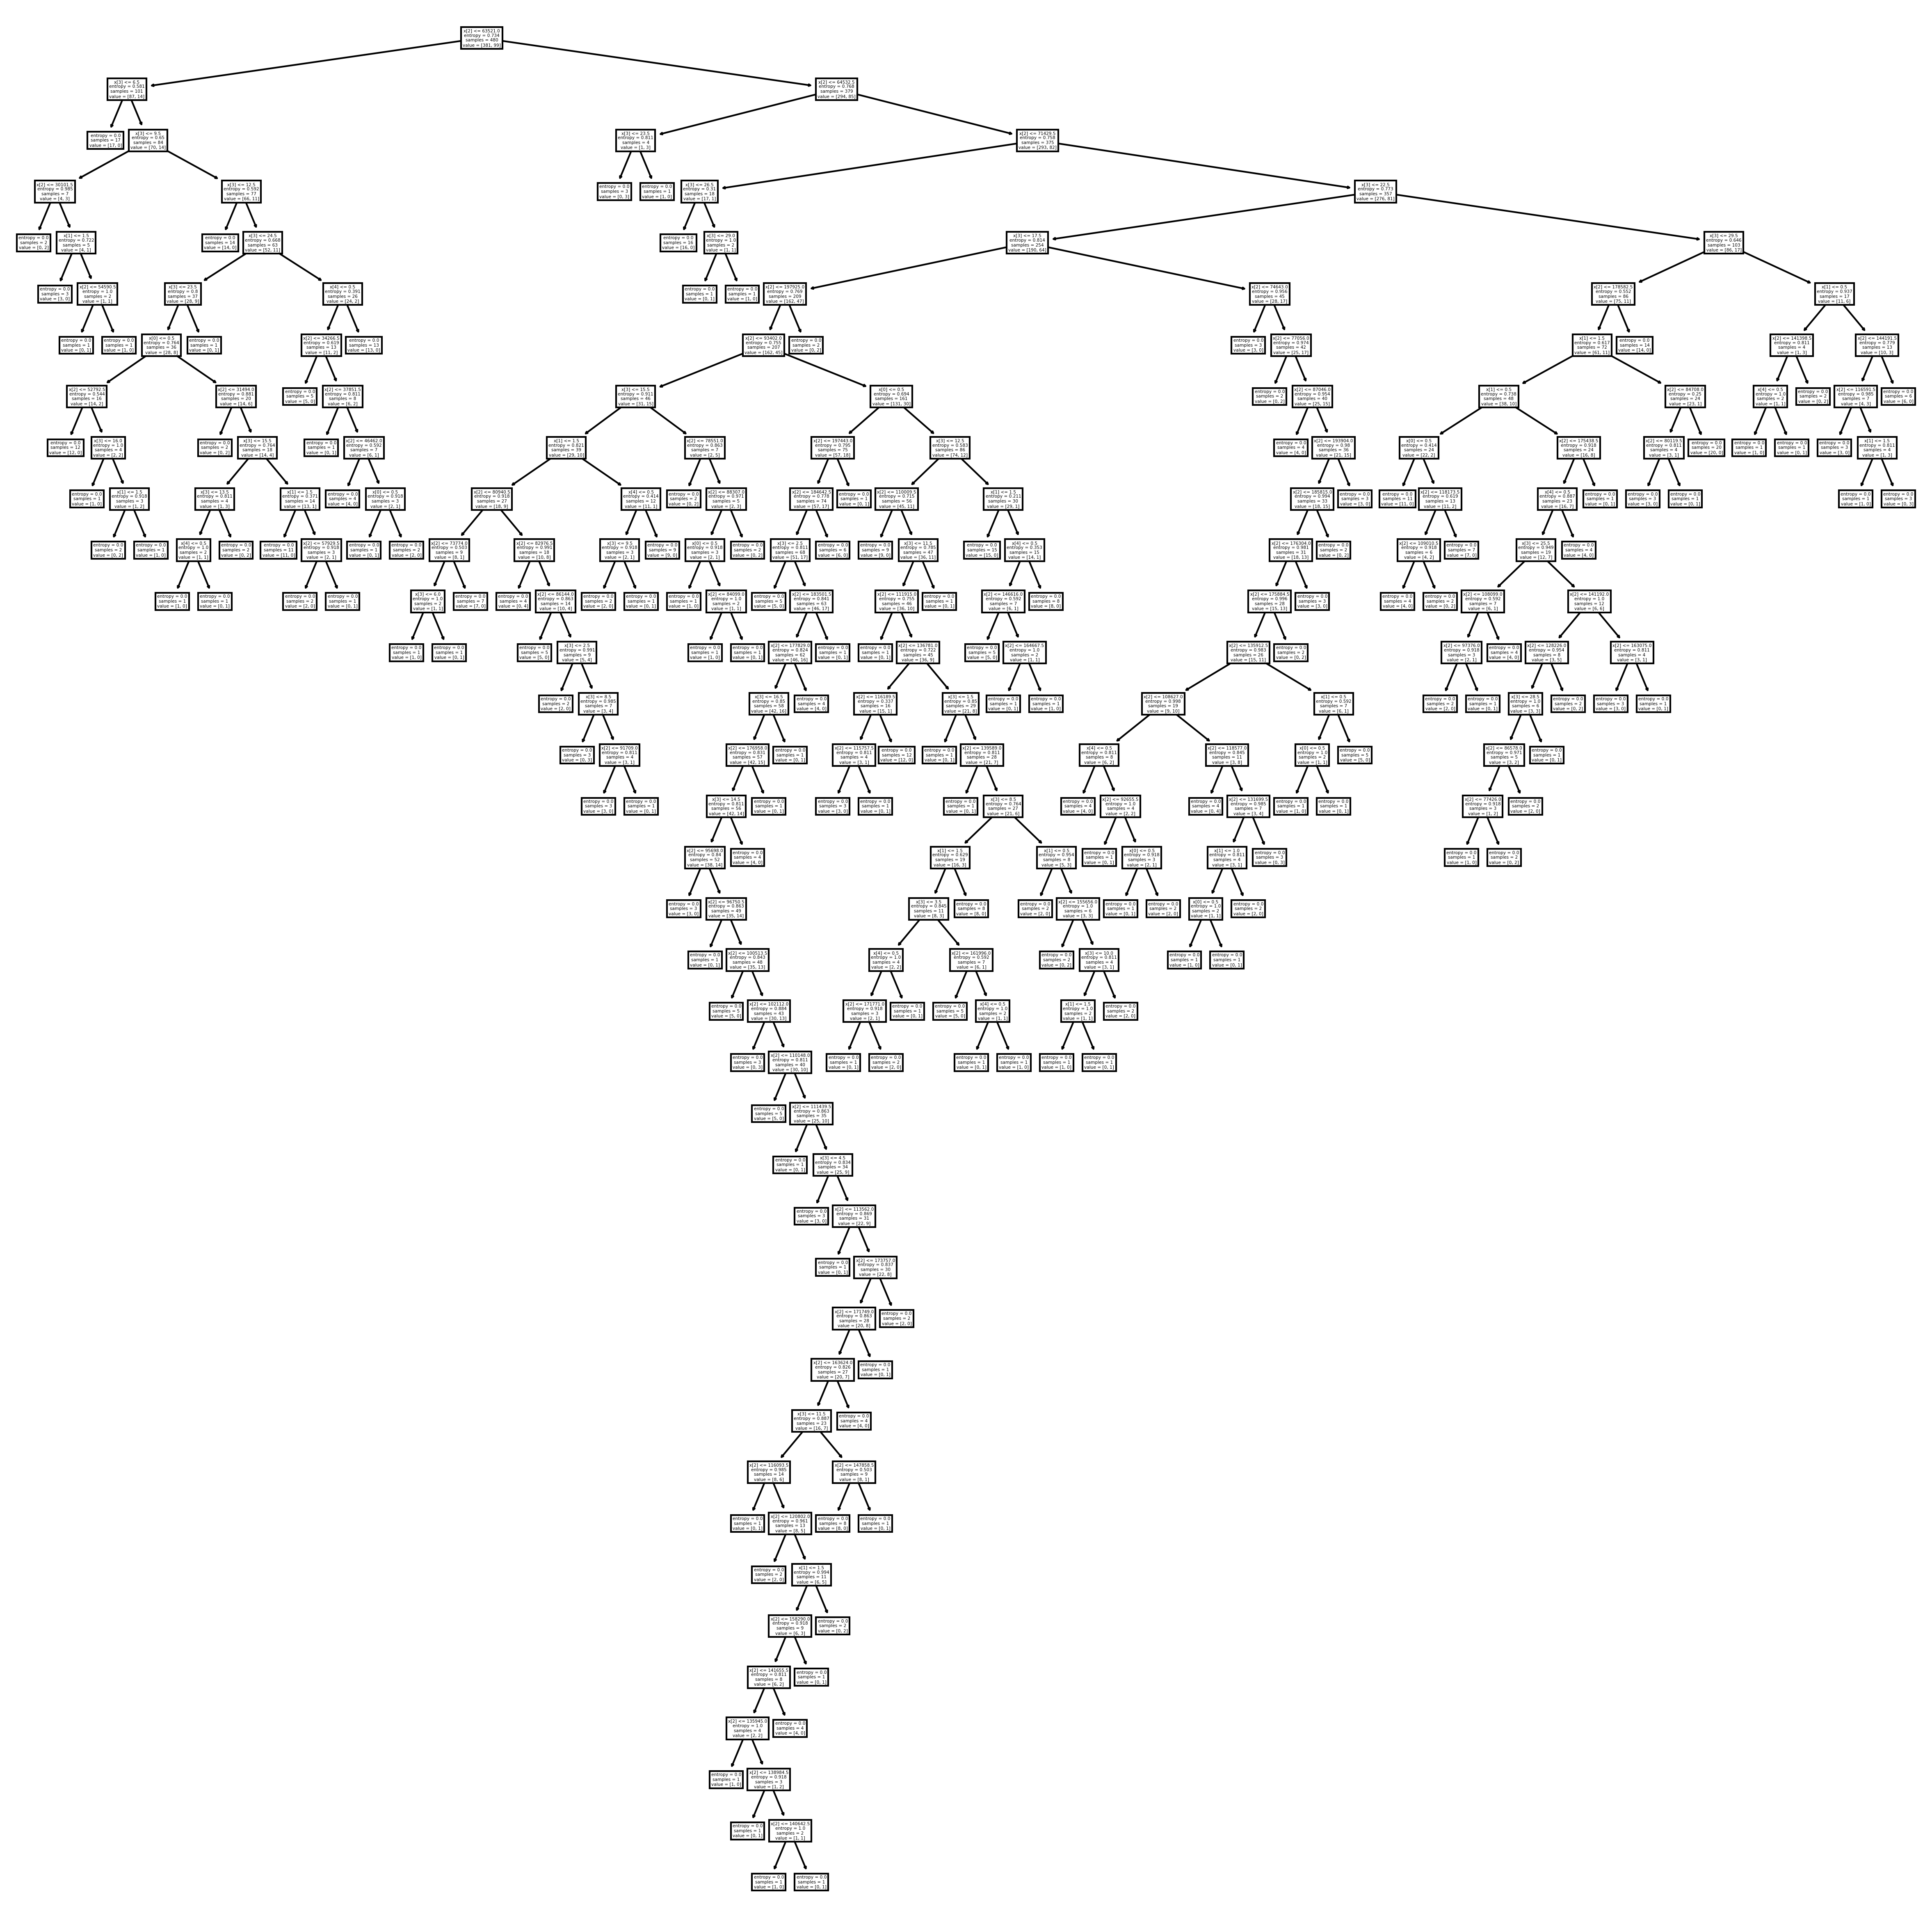

In [64]:
#PLot the decision tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=300)
tree.plot_tree(model)
plt.show()

Okay! things are not quite visible in the tree but let us see how good the model is working.

In [65]:
pred = model.predict(x_test)

In [66]:
pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [67]:
np.mean(pred == y_test)

0.7

In [68]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        95
           1       0.26      0.24      0.25        25

    accuracy                           0.70       120
   macro avg       0.53      0.53      0.53       120
weighted avg       0.69      0.70      0.70       120



So, here we have only 70% accuracy! Which is quite low.

In [70]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [71]:
fi

,feature,importance
2,City.Population,0.589301
3,Work.Experience,0.219137
1,Marital.Status,0.098401
4,Urban,0.049870
0,Undergrad,0.043291


Being a greedy learner the decision tree tends to overfit and therefore, gives low accuracy in the test dataset.


# Alternate Model

# Using Gini coefficient

In [72]:
x = df.iloc[:,0:5]
y = df['Taxable.Income']

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 101)

In [74]:
model3 = DecisionTreeClassifier(criterion = 'gini')
model3.fit(x_train, y_train)

DecisionTreeClassifier()

In [75]:
pred = model3.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [76]:
np.mean(pred == y_test)

0.6666666666666666

In [77]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       144
           1       0.20      0.22      0.21        36

    accuracy                           0.67       180
   macro avg       0.50      0.50      0.50       180
weighted avg       0.68      0.67      0.67       180



now it has only 66% accuracy

In [78]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model3.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [79]:
fi

,feature,importance
2,City.Population,0.546558
3,Work.Experience,0.172207
1,Marital.Status,0.136351
0,Undergrad,0.077492
4,Urban,0.067392


# Imbalanced data analysis

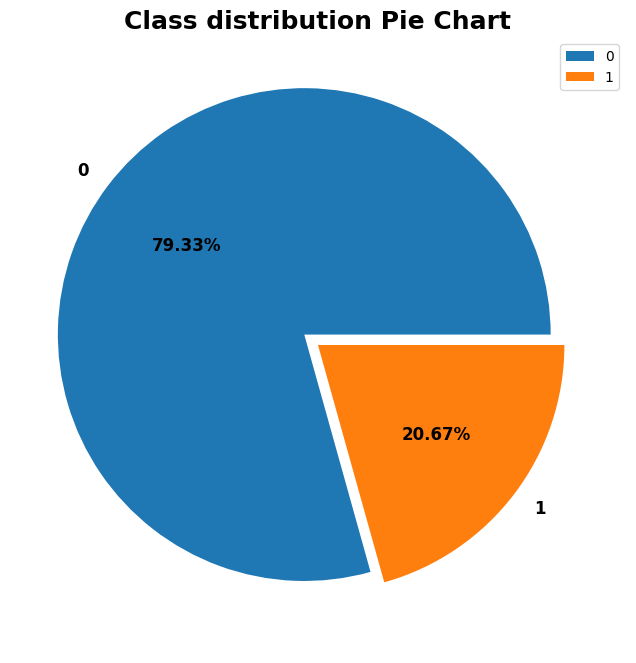

In [80]:
plt.figure(figsize = (12,8))
plt.pie(df['Taxable.Income'].value_counts(),
        labels = df['Taxable.Income'].unique(),
        explode = [0.07,0.0],
        autopct = '%.2f%%',
        textprops = {'size':'large',
                     'fontweight':'bold',
                     'rotation': 0,
                     'color':'k'})
plt.legend(loc = 'upper right')
plt.title('Class distribution Pie Chart', fontsize = 18, fontweight = 'bold')
plt.show()

The data is clearly imbalanced!

In [84]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [85]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 332, 1: 88})
After Counter({0: 332, 1: 332})


In [86]:
model.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(criterion='entropy')

In [89]:
pred = model.predict(x_test)
pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0])

In [90]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76       144
           1       0.16      0.19      0.17        36

    accuracy                           0.63       180
   macro avg       0.47      0.47      0.47       180
weighted avg       0.66      0.63      0.64       180



In [92]:
from sklearn.metrics import confusion_matrix

In [93]:
print(confusion_matrix(y_test, pred))

[[106  38]
 [ 29   7]]


Well, decision tree is a greedy learner so there is nothing more we can do about it! 

# End of assignment